In [201]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
def pkl_process(data=None, file=None, mode="dump"):
    f_mode = "wb" if mode == "dump" else "rb"
    load_data = None
    
    with open(file, f_mode) as f:
        if mode == "dump":
            pickle.dump(data, f)
        else:
            load_data = pickle.load(f)
    
    return load_data

# load data

In [223]:
nafld_file = "NAFLD.csv"
df = pd.read_csv(nafld_file, dtype=str)
df.head(5)

,STUDY_CO,NGT_IFG_,NGT__PRE,DM_STATU,MS,AGE,GNDR,ETHNICIT,WT__KG_,HEIGHT__,...,BILIRRUB,PLATELET,ALBUMIN,TSH,MEAN_FPG,NASH_OUT,NASH_OU2,FIBROSIS,FIBROSI2,NAFLD_OU
0,4062,DIAB,DIAB,1,NaN,43,0,AA,74.7,160.7,...,NaN,313,4.9,0.8,NaN,NaN,0,NaN,0,0
1,1108cx,IFG,PreDM,0,1,64,1,Caucasian,124.7,187,...,0.6,257,3.8,2.76,123.5,NaN,0,NaN,0,0
2,3029,DIAB,DIAB,1,1,61,1,Caucasian,96.7,185.4,...,0.9,289,4.4,1.12,NaN,NaN,0,NaN,0,0
3,4162,DIAB,DIAB,1,NaN,53,0,AA,81.6,163.8,...,0.2,316,4.4,0.5,133,NaN,0,NaN,0,0
4,4119,DIAB,DIAB,1,NaN,71,1,AA,92.99,180.3,...,0.5,174,4.4,2.53,133,NaN,0,NaN,0,0


In [6]:
df.isnull().sum()

STUDY_CO      0
NGT_IFG_      5
NGT__PRE      2
DM_STATU      1
MS          167
AGE           1
GNDR          1
ETHNICIT      2
WT__KG_       1
HEIGHT__      1
BMI           1
BODY_SUR      1
HOMA         51
SBP          27
DBP          27
ON_BP_ME     83
CHOL          3
TG            3
LDL          19
HDL           3
DYSLIPID     64
ON_STATI     66
COMBINAT     69
A1C           5
ON_METFO     79
ON_SU        83
AST_M0        3
ALT_M0        3
BILIRRUB     94
PLATELET     57
ALBUMIN      76
TSH          99
MEAN_FPG     30
NASH_OUT    137
NASH_OU2      0
FIBROSIS    137
FIBROSI2      0
NAFLD_OU      4
dtype: int64

In [84]:
len(df[df['NAFLD_OU'] == '1']), len(df[df['NAFLD_OU'] == '0']), len(df[df['NAFLD_OU'].notna()]), len(df[df['NAFLD_OU'].isna()])

(342, 149, 491, 4)

In [87]:
'''
outcome must be defined
we drop the data with undefined outcomes (n=4)
'''

df = df[df['NAFLD_OU'].notna()]

In [224]:
miss_threshold = 10
print(f'''
first check how many nan for each patient, if some of the key nan is missing, then we can discard the data point

remove columns: 'NASH_OUT', 'FIBROSIS', 'WT__KG_', 'HEIGHT__', 'STUDY_CO', 'BODY_SUR'

criteria:
if more than {miss_threshold} fields are nan
''')


first check how many nan for each patient, if some of the key nan is missing, then we can discard the data point

remove columns: 'NASH_OUT', 'FIBROSIS', 'WT__KG_', 'HEIGHT__', 'STUDY_CO', 'BODY_SUR'

criteria:
if more than 10 fields are nan



In [ ]:
#remove columns
remove_cols = {'NASH_OUT', 'FIBROSIS', 'WT__KG_', 'HEIGHT__', 'STUDY_CO', 'BODY_SUR'}
for each in remove_cols:
    del df[each]

In [11]:
df.head()

,NGT_IFG_,NGT__PRE,DM_STATU,MS,AGE,GNDR,ETHNICIT,BMI,HOMA,SBP,...,AST_M0,ALT_M0,BILIRRUB,PLATELET,ALBUMIN,TSH,MEAN_FPG,NASH_OU2,FIBROSI2,NAFLD_OU
0,DIAB,DIAB,1,NaN,43,0,AA,28.92603107,NaN,139,...,14,11,NaN,313,4.9,0.8,NaN,0,0,0
1,IFG,PreDM,0,1,64,1,Caucasian,35.66015614,1.993350988,126,...,36,28,0.6,257,3.8,2.76,123.5,0,0,0
2,DIAB,DIAB,1,1,61,1,Caucasian,28.13241494,NaN,104,...,14,15,0.9,289,4.4,1.12,NaN,0,0,0
3,DIAB,DIAB,1,NaN,53,0,AA,30.41321723,3.283950617,157,...,20,23,0.2,316,4.4,0.5,133,0,0,0
4,DIAB,DIAB,1,NaN,71,1,AA,28.6051872,2.955555556,143,...,20,21,0.5,174,4.4,2.53,133,0,0,0


In [111]:
def count_nan(row):
    c = 0
    for each in row:
        if each is np.nan:
            c += 1
    if c >= miss_threshold:
        return 1
    return 0

df['mc'] = df.apply(count_nan, axis=1)
print("using missing threshold: ", miss_threshold, "filtered # of data: ", len(df[df['mc'] == 1]), "total # of data: ", len(df))
df = df[df['mc'] == 0]
df = df.drop(columns='mc')
len(df)

using missing threshold:  10 filtered # of data:  0 total # of data:  433


433

In [112]:
len(df[df['NAFLD_OU'] == '1']), len(df[df['NAFLD_OU'] == '0'])

(288, 145)

# replace nan value

In [114]:
from collections import defaultdict

In [115]:
#collect unique values for each column
unique_values_dict = {'1':defaultdict(set), '0':defaultdict(set)}

def f1(row):
    label = row['NAFLD_OU']
    for k, v in row.items():
        if v is not np.nan:
            unique_values_dict[label][k].add(v)

x=df.apply(f1, axis=1)

In [116]:
pkl_process(unique_values_dict, "unique_value_dict.pkl")

In [117]:
unique_values_dict = pkl_process(None, "unique_value_dict.pkl", 'load')

In [118]:
import random

In [172]:
df1 = pd.DataFrame()

In [173]:
'''
fill nan
methods:
1. random picked from same column (must from same outcome) (first tested)
2. median of the column
3. average of the column
4. cloest case based on all physical factors
'''

def f2(row):
    label = row['NAFLD_OU']
    for k, v in row.items():
        if v is np.nan:
            row[k] = random.choice(list(unique_values_dict[label][k]))
    return row

df1 = df1.append(df.apply(f2, axis=1))

In [222]:
df1.head()

,NGT_IFG_,NGT__PRE,DM_STATU,MS,AGE,GNDR,ETHNICIT,BMI,HOMA,SBP,...,AST_M0,ALT_M0,BILIRRUB,PLATELET,ALBUMIN,TSH,MEAN_FPG,NASH_OU2,FIBROSI2,NAFLD_OU
0,0,0,1,0,0,0,0,2,265,1,...,0,0,0,1,1,0,2,0,0,0
1,1,2,0,1,2,1,2,3,124,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,1,2,1,2,2,236,0,...,0,0,0,1,1,0,2,0,0,0
3,0,0,1,1,1,0,0,3,243,1,...,0,0,0,1,1,0,2,0,0,0
4,0,0,1,1,3,1,0,2,216,1,...,0,0,0,1,1,0,2,0,0,0


# convert continous data to categorical data

In [185]:
#defined range split
'''
criteria:
ngt_ifg_: NGT=normal glucose tolerance; IFG: impaired fasting glucose; IGT: impaired glucose tolerance; DIAB: T2DM
ngt__pre: NGT=normal glucose tolerance; PreDM: prediabetes; DIAB: T2DM
dm_statu: diabetes status 1=yes 0=no
ms: metabolic syndrome 1=yes 0=no
dyslipid: dyslipidemia 1=yes 0=no
on_stati: use of statins 1=yes 0=no
combinat: use of fibrates, niacin or omega-3 1=yes 0=no
on_metfo: use of metformin 1=yes 0=no
on_su: use of sulfonylureas 1=yes 0=no
gndr: 1=male 0=female

ageI would try >50, >60, >70
ethnicit Not continuous
bmi
body_sur: body surface (I would remove this variable as it will not be available in epic to then extrapolate the model)
homa (I would remove this variable as it will not be available in epic to then extrapolate the model)
sbp: systolic blood pressure >130 or >140 (try 130 first)
dbp: diastolic: >80 or >90 (try 80 first)
on_bp_me: use of BP meds (1= yes 0=no) Not continuous
chol: total cholesterol: >200
tg: triglycerides: >150
ldl: >100, >130, >160
hdl: <40 for males and <50 for females
a1c: We can try >=5.7%, >=6.0%, >=6.5%, or >=7.0  (using <5.7, 5.7-6.5, >6.5)

ast_m0: AST. Use >=40
alt_m0: ALT. Use >=40, You can also try with >=30 for male and >=19 for female
bilirrub: maybe >=1 (all patients may have lower results than this).
platelet: We can try >=100 or >=150
albumin: >=4
tsh:>=4
mean_fpg: fasting plasma glucose. We can try >=100, >=126, or >=150
'''
#create config json cat -> categorical; ex -> exclude variable; [1,2] define 3 ranges as (, 1] & (1, 2] & (2, ) 
# same variable is gender depended using dictionary -> {1:[] #male, 0:[]#female}
# 'outcome' identify this is the predictor
conf = {
 'NGT_IFG_': 'cat',
 'NGT__PRE': 'cat',
 'DM_STATU': 'cat',
 'MS': 'cat',
 'AGE': [50.0, 60.0, 70.0],
 'GNDR': 'cat',
 'ETHNICIT': 'cat',
 'BMI': [18.5, 24.9, 29.9],
 'HOMA': [],
 'SBP': [130.0],
 'DBP': [80.0],
 'ON_BP_ME': 'cat',
 'CHOL': [200.0],
 'TG': [150.0],
 'LDL': [100.0, 130.0, 160.0],
 'HDL': {'1':[40.0], '0':[50.0]},
 'DYSLIPID': 'cat',
 'ON_STATI': 'cat',
 'COMBINAT': 'cat',
 'A1C': [5.7, 6.5],
 'ON_METFO': 'cat',
 'ON_SU': 'cat',
 'AST_M0': [40.0],
 'ALT_M0': [40.0],
 'BILIRRUB': [1.0],
 'PLATELET': [150.0],
 'ALBUMIN': [4.0],
 'TSH': [4.0],
 'MEAN_FPG': [100.0, 125.0],
 'NAFLD_OU': 'outcome',
 'NASH_OU2':'outcome',
 'FIBROSI2': 'outcome'}

In [186]:
def cat2idx(data:float, bound:list, g:str) -> int:
    idx = 0
    if isinstance(bound, list):
        bound = bound
    elif isinstance(bound, dict):
        bound = bound[g]
    while idx < len(bound) and data > bound[idx]:
        idx += 1
    return idx

def float2cat(col, col_name, genders):
    n_col = []
    for i, each in enumerate(col):
        g = genders[i]
        n_col.append(cat2idx(float(each), conf[col_name], g))
    return np.array(n_col)

In [187]:
import copy
generders = list(copy.deepcopy(df1['GNDR']))

In [188]:
from sklearn.preprocessing import LabelEncoder
def cat2cat(col):
    le = LabelEncoder()
    return le.fit_transform(col)

In [189]:
for k, v in conf.items():
    if not(isinstance(v, list) or isinstance(v, dict)):
        df1[k] = cat2cat(df1[k])
    else:
        df1[k] = float2cat(df1[k], k, generders)

In [190]:
df1.head()

,NGT_IFG_,NGT__PRE,DM_STATU,MS,AGE,GNDR,ETHNICIT,BMI,HOMA,SBP,...,AST_M0,ALT_M0,BILIRRUB,PLATELET,ALBUMIN,TSH,MEAN_FPG,NASH_OU2,FIBROSI2,NAFLD_OU
0,0,0,1,0,0,0,0,2,265,1,...,0,0,0,1,1,0,2,0,0,0
1,1,2,0,1,2,1,2,3,124,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,1,2,1,2,2,236,0,...,0,0,0,1,1,0,2,0,0,0
3,0,0,1,1,1,0,0,3,243,1,...,0,0,0,1,1,0,2,0,0,0
4,0,0,1,1,3,1,0,2,216,1,...,0,0,0,1,1,0,2,0,0,0


# t-SNE clustering

In [202]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [204]:
def train_TSNE(data, dim=2, p=30, ee=12.0, lr=100.0, itr=1000):
    return TSNE(n_components=dim, perplexity=p, early_exaggeration=ee, learning_rate=lr, n_iter=itr).fit_transform(np.array(data))

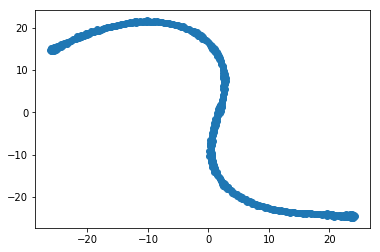

In [219]:
df2 = df1.drop(columns=['NAFLD_OU'])
tp = train_TSNE(df2, 2, 30, 15)
# df2.head()
x = tp[:, 0]
y = tp[:, 1]

plt.scatter(x, y)
plt.show()

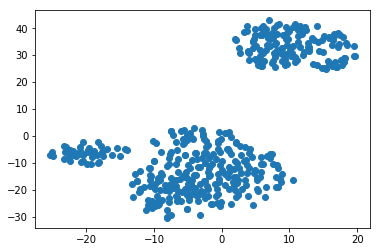

In [220]:
df2 = df1.drop(columns=['HOMA', 'NAFLD_OU'])
tp = train_TSNE(df2, 2, 30, 15)
# df2.head()
x = tp[:, 0]
y = tp[:, 1]

plt.scatter(x, y)
plt.show()

# encode categorical data

In [191]:
#save categorized data -> only label encoding
df1.to_csv("preprocessed_NAFLD.csv")

In [234]:
#one hot encoding (each level is a new column; all data are 0, 1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [235]:
pkl_process(np.array(df1['NAFLD_OU']), 'y.pkl')

In [237]:
one_no_homa_data1 = ohe.fit_transform(df2).toarray()
pkl_process(one_no_homa_data1, 'no_noma_with_nash_fab_OHE_X.pkl')

In [238]:
df3 = df2.drop(columns=['NASH_OU2', 'FIBROSI2'])
one_no_homa_data2 = ohe.fit_transform(df3).toarray()
pkl_process(one_no_homa_data2, 'no_noma_OHE_X.pkl')

In [ ]:
df4 = df1.drop(columns=['NASH_OU2', 'FIBROSI2', 'NAFLD_OU'])
one_no_homa_data3 = ohe.fit_transform(df4).toarray()
pkl_process(one_no_homa_data3, 'with_noma_OHE_X.pkl')

In [233]:
#feature hashing
from sklearn.feature_extraction import FeatureHasher
#convert data to uni-feature space then feature hashing (libsvm format first -> convert to dict)